In [1]:
%run auxStandardStructure.ipynb

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## Preprocessing

In [3]:
all_releases_df = pd.read_csv('raw_data.csv')

In [4]:
X, y = generateStandardTimeSeriesStructure(all_releases_df, 3)

Generating a new dataframe without containing the last release...
... DONE!
checking class larger than window size...
DONE
Setting the features...
DONE
X: (5015, 24) y: (5015,)


In [5]:
print("Declaring a dictionary to save results...")
results_dict = dict()
print("... DONE!")

print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("General information:")
print("X Train set:", X_train.shape[0], "X Test set:", X_test.shape[0])
print("y Train set:", y_train.shape[0], "y Test set:", y_test.shape[0])
print("... DONE!")

print("Scaling features...")
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
print("... DONE!")

print("Setting stratified k-fold...")
k=5
kf = StratifiedKFold(n_splits=k, shuffle=False, random_state=42)
print("k =", k)
print("... DONE!\n")

Declaring a dictionary to save results...
... DONE!
Splitting dataset into train and test sets...
General information:
X Train set: 3510 X Test set: 1505
y Train set: 3510 y Test set: 1505
... DONE!
Scaling features...
... DONE!
Setting stratified k-fold...
k = 5
... DONE!



In [6]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

## Statistical Analysis

In [7]:
all_releases_df.describe()

,instanceID,Path,releaseID,CountClassCoupled,SumCyclomatic,MaxInheritanceTree,PercentLackOfCohesion,CountLineCode,CountClassDerived,CountDeclMethodAll,CountDeclMethod,class_frequency,number_of_changes,will_change,change_probability
count,11576.000000,1.157600e+04,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000
mean,5788.500000,9.148070e+18,4.980736,5.731513,12.279976,0.737474,0.143208,25.408431,0.445836,7.048981,1.235228,3.253455,0.074724,0.027039,0.016102
std,3341.847693,5.334891e+18,2.099896,9.568403,22.150706,1.602837,0.267863,66.493345,5.198372,18.958755,3.239050,1.767779,0.330764,0.162203,0.071078
min,1.000000,1.733956e+15,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2894.750000,4.535835e+18,3.000000,0.000000,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,5788.500000,9.219503e+18,5.000000,3.000000,7.000000,0.000000,0.000000,9.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
75%,8682.250000,1.373644e+19,7.000000,7.000000,13.000000,0.000000,0.000000,21.000000,0.000000,6.000000,1.000000,5.000000,0.000000,0.000000,0.000000
max,11576.000000,1.843342e+19,8.000000,162.000000,488.000000,7.000000,1.000000,1369.000000,189.000000,413.000000,56.000000,8.000000,5.000000,1.000000,0.800000


0
False    3364
True      146
Name: 0, dtype: int64

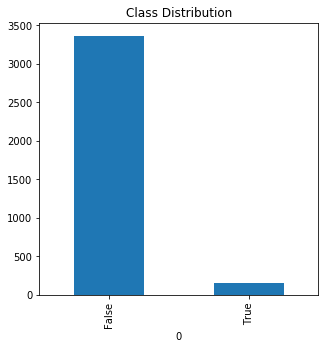

In [8]:
ax = y_train.groupby([0])[0].count().plot.bar(title="Class Distribution", figsize=(5,5))
y_train.groupby([0])[0].count()

In [9]:
X_train.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.0,-0.059,0.41,0.88,0.47,0.34,0.12,0.26,0.99,-0.044,0.3,0.87,0.47,0.34,0.12,0.26,0.99,-0.042,0.29,0.87,0.47,0.34,0.12,0.25
1,-0.059,1.0,-0.043,-0.1,0.0029,0.056,0.027,0.069,-0.031,0.96,-0.018,-0.074,0.0034,0.065,0.028,0.068,-0.029,0.96,-0.029,-0.074,0.0034,0.068,0.026,0.069
2,0.41,-0.043,1.0,0.48,0.5,-0.062,0.25,0.3,0.42,-0.062,0.75,0.49,0.5,-0.057,0.25,0.31,0.42,-0.064,0.76,0.49,0.5,-0.056,0.25,0.3
3,0.88,-0.1,0.48,1.0,0.53,0.29,0.21,0.27,0.87,-0.093,0.34,0.99,0.53,0.29,0.2,0.27,0.87,-0.094,0.34,0.99,0.52,0.29,0.2,0.27
4,0.47,0.0029,0.5,0.53,1.0,0.0064,0.32,0.81,0.49,-0.0075,0.36,0.54,1.0,0.011,0.32,0.81,0.48,-0.0062,0.36,0.54,0.99,0.011,0.32,0.81
5,0.34,0.056,-0.062,0.29,0.0064,1.0,0.073,0.067,0.34,0.062,-0.058,0.29,0.0054,1.0,0.072,0.065,0.34,0.06,-0.062,0.29,0.0072,0.99,0.072,0.065
6,0.12,0.027,0.25,0.21,0.32,0.073,1.0,0.36,0.13,0.025,0.16,0.21,0.32,0.074,1.0,0.36,0.13,0.03,0.16,0.21,0.32,0.076,0.99,0.36
7,0.26,0.069,0.3,0.27,0.81,0.067,0.36,1.0,0.27,0.062,0.21,0.28,0.81,0.071,0.36,0.99,0.27,0.064,0.21,0.28,0.81,0.071,0.36,0.99
8,0.99,-0.031,0.42,0.87,0.49,0.34,0.13,0.27,1.0,-0.042,0.31,0.88,0.48,0.34,0.12,0.27,1.0,-0.041,0.3,0.88,0.48,0.34,0.12,0.26
9,-0.044,0.96,-0.062,-0.093,-0.0075,0.062,0.025,0.062,-0.042,1.0,-0.04,-0.091,-0.0067,0.064,0.025,0.062,-0.041,0.99,-0.049,-0.09,-0.0058,0.064,0.026,0.062


## Imbalanced baseline

In [10]:
%%time
LogisticRegr_(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7526745913818722
2 of KFold 5
ROC AUC score: 0.6985960957114311
3 of KFold 5
ROC AUC score: 0.679125890249526
4 of KFold 5
ROC AUC score: 0.7476558897371522
5 of KFold 5
ROC AUC score: 0.7332204433497537

CROSS VALIDANTION SUMMARY:
Mean: 0.7222545820859471
Std deviation: 0.028672849688395237

TEST SET:
F1-Score(micro): 0.774750830564784
F1-Score(macro): 0.5479675617918096
F1-Score(weighted): 0.8362333490219974
F1-Score(None): [0.86814469 0.22779043]
Accuracy: 0.774750830564784
Sensitivity: 0.6666666666666666
Specificity: 0.7804195804195804
Confusion Matrix: [0.7804195804195804, 0.67]
ROC AUC score: 0.7235431235431233
CPU times: user 388 ms, sys: 260 ms, total: 649 ms
Wall time: 98.8 ms


In [11]:
%%time
DecisionTree_(X_train, y_train, X_test, y_test)

CPU times: user 13 µs, sys: 2 µs, total: 15 µs
Wall time: 3.81 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5973501733531451
2 of KFold 5
ROC AUC score: 0.5451913716247374
3 of KFold 5
ROC AUC score: 0.6043449300609725
4 of KFold 5
ROC AUC score: 0.558718040682482
5 of KFold 5
ROC AUC score: 0.5879515599343186

CROSS VALIDANTION SUMMARY:
Mean: 0.5787112151311311
Std deviation: 0.022861272974247903

TEST SET:
F1-Score(micro): 0.9076411960132891
F1-Score(macro): 0.5828123348509595
F1-Score(weighted): 0.9142453972568002
F1-Score(None): [0.9509354  0.21468927]
Accuracy: 0.9076411960132891
Sensitivity: 0.25333333333333335
Specificity: 0.941958041958042
Confusion Matrix: [0.941958041958042, 0.25]
ROC AUC score: 0.5976456876456877
CPU times: user 269 ms, sys: 163 ms, total: 433 ms
Wall time: 59 ms


In [12]:
%%time
RandomForest_(X_train, y_train, X_test, y_test)

CPU times: user 16 µs, sys: 2 µs, total: 18 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.578132738979693
2 of KFold 5
ROC AUC score: 0.5735768816928832
3 of KFold 5
ROC AUC score: 0.5630219808372189
4 of KFold 5
ROC AUC score: 0.5240815699134087
5 of KFold 5
ROC AUC score: 0.5900554187192117

CROSS VALIDANTION SUMMARY:
Mean: 0.5657737180284832
Std deviation: 0.022578941616023897

TEST SET:
F1-Score(micro): 0.9541528239202658
F1-Score(macro): 0.625006770786314
F1-Score(weighted): 0.9413137934788706
F1-Score(None): [0.97632933 0.27368421]
Accuracy: 0.9541528239202658
Sensitivity: 0.17333333333333334
Specificity: 0.9951048951048951
Confusion Matrix: [0.9951048951048951, 0.17]
ROC AUC score: 0.5842191142191142
CPU times: user 710 ms, sys: 386 µs, total: 710 ms
Wall time: 704 ms


In [13]:
%%time
NN_(X_train, y_train, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5485141158989599
2 of KFold 5
ROC AUC score: 0.5337398165701696
3 of KFold 5
ROC AUC score: 0.5337398165701696
4 of KFold 5
ROC AUC score: 0.5667366910898192
5 of KFold 5
ROC AUC score: 0.584718801313629

CROSS VALIDANTION SUMMARY:
Mean: 0.5534898482885494
Std deviation: 0.01977681354420377

TEST SET:
F1-Score(micro): 0.9548172757475083
F1-Score(macro): 0.6266380643843212
F1-Score(weighted): 0.941792445246914
F1-Score(None): [0.97668038 0.27659574]
Accuracy: 0.9548172757475083
Sensitivity: 0.17333333333333334
Specificity: 0.9958041958041958
Confusion Matrix: [0.9958041958041958, 0.17]
ROC AUC score: 0.5845687645687645
CPU times: user 23.6 s, sys: 13.8 s, total: 37.5 s
Wall time: 4.71 s


## Undersampling

In [14]:
print("Resampling dataset using Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y RUS:", len(X_RUS), len(y_RUS))

Resampling dataset using Random UnderSampling (RUS)...
... DONE!
X and Y RUS: 292 292


In [15]:
%%time
LogisticRegr_(X_RUS, y_RUS, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7053571428571429
2 of KFold 5
ROC AUC score: 0.7150943396226416
3 of KFold 5
ROC AUC score: 0.39473684210526316
4 of KFold 5
ROC AUC score: 0.9545454545454545
5 of KFold 5
ROC AUC score: 0.4636363636363636

CROSS VALIDANTION SUMMARY:
Mean: 0.6466740285533732
Std deviation: 0.19994248898483963

TEST SET:
F1-Score(micro): 0.8870431893687707
F1-Score(macro): 0.6091888357997385
F1-Score(weighted): 0.905873350445947
F1-Score(None): [0.93871665 0.27966102]
Accuracy: 0.8870431893687708
Sensitivity: 0.44
Specificity: 0.9104895104895104
Confusion Matrix: [0.9104895104895104, 0.44]
ROC AUC score: 0.6752447552447552
CPU times: user 199 ms, sys: 127 ms, total: 326 ms
Wall time: 41.4 ms


In [16]:
%%time
DecisionTree_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 14 µs, sys: 6 µs, total: 20 µs
Wall time: 4.53 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5982142857142857
2 of KFold 5
ROC AUC score: 0.7716981132075472
3 of KFold 5
ROC AUC score: 0.4736842105263158
4 of KFold 5
ROC AUC score: 0.7969696969696969
5 of KFold 5
ROC AUC score: 0.6575757575757576

CROSS VALIDANTION SUMMARY:
Mean: 0.6596284127987206
Std deviation: 0.11812992918408567

TEST SET:
F1-Score(micro): 0.906312292358804
F1-Score(macro): 0.5722751322751324
F1-Score(weighted): 0.9125911863453393
F1-Score(None): [0.95026455 0.19428571]
Accuracy: 0.906312292358804
Sensitivity: 0.22666666666666666
Specificity: 0.941958041958042
Confusion Matrix: [0.941958041958042, 0.23]
ROC AUC score: 0.5843123543123543
CPU times: user 169 ms, sys: 91.5 ms, total: 260 ms
Wall time: 33.8 ms


In [17]:
%%time
RandomForest_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 13 µs, sys: 6 µs, total: 19 µs
Wall time: 4.53 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6160714285714286
2 of KFold 5
ROC AUC score: 0.690566037735849
3 of KFold 5
ROC AUC score: 0.5
4 of KFold 5
ROC AUC score: 0.5
5 of KFold 5
ROC AUC score: 0.5

CROSS VALIDANTION SUMMARY:
Mean: 0.5613274932614555
Std deviation: 0.07871808447908768

TEST SET:
F1-Score(micro): 0.9441860465116279
F1-Score(macro): 0.6234182494101947
F1-Score(weighted): 0.9363342789799873
F1-Score(None): [0.97097443 0.27586207]
Accuracy: 0.9441860465116279
Sensitivity: 0.21333333333333335
Specificity: 0.9825174825174825
Confusion Matrix: [0.9825174825174825, 0.21]
ROC AUC score: 0.5979254079254079
CPU times: user 330 ms, sys: 37.7 ms, total: 368 ms
Wall time: 281 ms


In [18]:
%%time
NN_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6160714285714286
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.590566037735849
3 of KFold 5
ROC AUC score: 0.5
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8333333333333333
5 of KFold 5
ROC AUC score: 0.5

CROSS VALIDANTION SUMMARY:
Mean: 0.6079941599281222
Std deviation: 0.122042780974534

TEST SET:
F1-Score(micro): 0.946843853820598
F1-Score(macro): 0.6290545203588682
F1-Score(weighted): 0.93817479806213
F1-Score(None): [0.97239476 0.28571429]
Accuracy: 0.946843853820598
Sensitivity: 0.21333333333333335
Specificity: 0.9853146853146854
Confusion Matrix: [0.9853146853146854, 0.21]
ROC AUC score: 0.5993240093240094
CPU times: user 4.06 s, sys: 2.56 s, total: 6.62 s
Wall time: 852 ms


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
print("Resampling dataset using Edited Nearest Neighbour (ENN)...")
X_ENN, y_ENN = EditedNearestNeighbours(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y ENN:", len(X_ENN), len(y_ENN))

Resampling dataset using Edited Nearest Neighbour (ENN)...
... DONE!
X and Y ENN: 3185 3185


In [20]:
%%time
LogisticRegr_(X_ENN, y_ENN, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7382154434819578
2 of KFold 5
ROC AUC score: 0.6134046169097862
3 of KFold 5
ROC AUC score: 0.7413964027758108
4 of KFold 5
ROC AUC score: 0.7178198791872599
5 of KFold 5
ROC AUC score: 0.7582236842105263

CROSS VALIDANTION SUMMARY:
Mean: 0.7138120053130683
Std deviation: 0.05181993959721539

TEST SET:
F1-Score(micro): 0.762126245847176
F1-Score(macro): 0.5390292398461348
F1-Score(weighted): 0.8277555465619045
F1-Score(None): [0.85971787 0.21834061]
Accuracy: 0.762126245847176
Sensitivity: 0.6666666666666666
Specificity: 0.7671328671328671
Confusion Matrix: [0.7671328671328671, 0.67]
ROC AUC score: 0.7168997668997668
CPU times: user 535 ms, sys: 251 ms, total: 786 ms
Wall time: 104 ms


In [21]:
%%time
DecisionTree_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 4.29 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5430993250783864
2 of KFold 5
ROC AUC score: 0.5206769579379691
3 of KFold 5
ROC AUC score: 0.5223056224330831
4 of KFold 5
ROC AUC score: 0.5802306425041186
5 of KFold 5
ROC AUC score: 0.6140742481203008

CROSS VALIDANTION SUMMARY:
Mean: 0.5560773592147716
Std deviation: 0.03608093181233326

TEST SET:
F1-Score(micro): 0.9156146179401994
F1-Score(macro): 0.5833015398232789
F1-Score(weighted): 0.9183344422402633
F1-Score(None): [0.95542296 0.21118012]
Accuracy: 0.9156146179401994
Sensitivity: 0.22666666666666666
Specificity: 0.9517482517482517
Confusion Matrix: [0.9517482517482517, 0.23]
ROC AUC score: 0.5892074592074591
CPU times: user 329 ms, sys: 177 ms, total: 506 ms
Wall time: 69.5 ms


In [22]:
%%time
RandomForest_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.540973587713238
2 of KFold 5
ROC AUC score: 0.5304489449086531
3 of KFold 5
ROC AUC score: 0.5103384789689845
4 of KFold 5
ROC AUC score: 0.5259198242723778
5 of KFold 5
ROC AUC score: 0.5615601503759399

CROSS VALIDANTION SUMMARY:
Mean: 0.5338481972478386
Std deviation: 0.017004966354056957

TEST SET:
F1-Score(micro): 0.9534883720930233
F1-Score(macro): 0.6234056851978953
F1-Score(weighted): 0.9408379355477168
F1-Score(None): [0.97597804 0.27083333]
Accuracy: 0.9534883720930233
Sensitivity: 0.17333333333333334
Specificity: 0.9944055944055944
Confusion Matrix: [0.9944055944055944, 0.17]
ROC AUC score: 0.5838694638694639
CPU times: user 741 ms, sys: 34 µs, total: 741 ms
Wall time: 736 ms


In [23]:
%%time
NN_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5483870967741935
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.499185667752443
3 of KFold 5
ROC AUC score: 0.5418495963744512
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5483525535420098
5 of KFold 5
ROC AUC score: 0.5868186090225564

CROSS VALIDANTION SUMMARY:
Mean: 0.5449187046931308
Std deviation: 0.027858044217245588

TEST SET:
F1-Score(micro): 0.9554817275747508
F1-Score(macro): 0.6283005444539056
F1-Score(weighted): 0.9422739885960764
F1-Score(None): [0.9770312  0.27956989]
Accuracy: 0.9554817275747508
Sensitivity: 0.17333333333333334
Specificity: 0.9965034965034965
Confusion Matrix: [0.9965034965034965, 0.17]
ROC AUC score: 0.5849184149184148
CPU times: user 28 s, sys: 15.5 s, total: 43.6 s
Wall time: 5.48 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
print("Resampling dataset using Tomek's Link (TL)...")
X_TL, y_TL = TomekLinks(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y TL:", len(X_TL), len(y_TL))

Resampling dataset using Tomek's Link (TL)...
... DONE!
X and Y TL: 3462 3462


In [25]:
%%time
LogisticRegr_(X_TL, y_TL, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7458110516934047
2 of KFold 5
ROC AUC score: 0.6561280249804841
3 of KFold 5
ROC AUC score: 0.7006239242685025
4 of KFold 5
ROC AUC score: 0.7437486410089149
5 of KFold 5
ROC AUC score: 0.7228070175438596

CROSS VALIDANTION SUMMARY:
Mean: 0.7138237318990331
Std deviation: 0.033173536899621506

TEST SET:
F1-Score(micro): 0.774750830564784
F1-Score(macro): 0.5462517375918379
F1-Score(weighted): 0.8361546130397238
F1-Score(None): [0.86824718 0.22425629]
Accuracy: 0.774750830564784
Sensitivity: 0.6533333333333333
Specificity: 0.7811188811188812
Confusion Matrix: [0.7811188811188812, 0.65]
ROC AUC score: 0.7172261072261072
CPU times: user 589 ms, sys: 298 ms, total: 887 ms
Wall time: 118 ms


In [26]:
%%time
DecisionTree_(X_TL, y_TL, X_test, y_test)

CPU times: user 10 µs, sys: 5 µs, total: 15 µs
Wall time: 4.53 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5508021390374331
2 of KFold 5
ROC AUC score: 0.563196366475055
3 of KFold 5
ROC AUC score: 0.5727194492254734
4 of KFold 5
ROC AUC score: 0.5343118069145466
5 of KFold 5
ROC AUC score: 0.6173210804789752

CROSS VALIDANTION SUMMARY:
Mean: 0.5676701684262966
Std deviation: 0.027957231287675303

TEST SET:
F1-Score(micro): 0.9069767441860465
F1-Score(macro): 0.5730184978032845
F1-Score(weighted): 0.9129985307474185
F1-Score(None): [0.9506347 0.1954023]
Accuracy: 0.9069767441860465
Sensitivity: 0.22666666666666666
Specificity: 0.9426573426573427
Confusion Matrix: [0.9426573426573427, 0.23]
ROC AUC score: 0.5846620046620046
CPU times: user 315 ms, sys: 196 ms, total: 511 ms
Wall time: 73.9 ms


In [27]:
%%time
RandomForest_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5636809269162211
2 of KFold 5
ROC AUC score: 0.5349513874104038
3 of KFold 5
ROC AUC score: 0.5296901893287436
4 of KFold 5
ROC AUC score: 0.5622961513372472
5 of KFold 5
ROC AUC score: 0.5968253968253968

CROSS VALIDANTION SUMMARY:
Mean: 0.5574888103636025
Std deviation: 0.02403962825800509

TEST SET:
F1-Score(micro): 0.9514950166112957
F1-Score(macro): 0.6032680328608829
F1-Score(weighted): 0.9379116945501095
F1-Score(None): [0.97495712 0.23157895]
Accuracy: 0.9514950166112957
Sensitivity: 0.14666666666666667
Specificity: 0.9937062937062937
Confusion Matrix: [0.9937062937062937, 0.15]
ROC AUC score: 0.5701864801864802
CPU times: user 794 ms, sys: 2.12 ms, total: 797 ms
Wall time: 790 ms


In [28]:
%%time
NN_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5410873440285204
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.4992548435171386
3 of KFold 5
ROC AUC score: 0.5892857142857143
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5540987171124158
5 of KFold 5
ROC AUC score: 0.5910888331940964

CROSS VALIDANTION SUMMARY:
Mean: 0.5549630904275771
Std deviation: 0.0339994236778601

TEST SET:
F1-Score(micro): 0.9548172757475083
F1-Score(macro): 0.6187829662961528
F1-Score(weighted): 0.9410239353737088
F1-Score(None): [0.97669637 0.26086957]
Accuracy: 0.9548172757475083
Sensitivity: 0.16
Specificity: 0.9965034965034965
Confusion Matrix: [0.9965034965034965, 0.16]
ROC AUC score: 0.5782517482517482
CPU times: user 28.6 s, sys: 17.4 s, total: 45.9 s
Wall time: 5.77 s


## Oversampling

In [29]:
print("Resampling dataset using Random OverSampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print("X and Y ROS:", len(X_ROS), len(y_ROS))

Resampling dataset using Random OverSampling (ROS)...
X and Y ROS: 6728 6728


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
%%time
LogisticRegr_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 14 µs, sys: 7 µs, total: 21 µs
Wall time: 5.25 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7080237741456167
2 of KFold 5
ROC AUC score: 0.7221396731054976
3 of KFold 5
ROC AUC score: 0.7265973254086181
4 of KFold 5
ROC AUC score: 0.7176820208023774
5 of KFold 5
ROC AUC score: 0.7113095238095237

CROSS VALIDANTION SUMMARY:
Mean: 0.7171504634543268
Std deviation: 0.0068092730979598

TEST SET:
F1-Score(micro): 0.7794019933554818
F1-Score(macro): 0.5530705269485072
F1-Score(weighted): 0.8394189274914113
F1-Score(None): [0.87111801 0.23502304]
Accuracy: 0.7794019933554818
Sensitivity: 0.68
Specificity: 0.7846153846153846
Confusion Matrix: [0.7846153846153846, 0.68]
ROC AUC score: 0.7323076923076923
CPU times: user 961 ms, sys: 658 ms, total: 1.62 s
Wall time: 207 ms


In [31]:
%%time
DecisionTree_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 13 µs, sys: 6 µs, total: 19 µs
Wall time: 4.53 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.9606240713224369
2 of KFold 5
ROC AUC score: 0.9650817236255572
3 of KFold 5
ROC AUC score: 0.9635958395245171
4 of KFold 5
ROC AUC score: 0.9576523031203567
5 of KFold 5
ROC AUC score: 0.9665178571428571

CROSS VALIDANTION SUMMARY:
Mean: 0.9626943589471451
Std deviation: 0.0031887218003831255

TEST SET:
F1-Score(micro): 0.920265780730897
F1-Score(macro): 0.5943614899466336
F1-Score(weighted): 0.9217153179767871
F1-Score(None): [0.95795375 0.23076923]
Accuracy: 0.920265780730897
Sensitivity: 0.24
Specificity: 0.955944055944056
Confusion Matrix: [0.955944055944056, 0.24]
ROC AUC score: 0.597972027972028
CPU times: user 328 ms, sys: 150 ms, total: 478 ms
Wall time: 106 ms


In [32]:
%%time
RandomForest_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.9673105497771175
2 of KFold 5
ROC AUC score: 0.9695393759286776
3 of KFold 5
ROC AUC score: 0.9717682020802378
4 of KFold 5
ROC AUC score: 0.9658246656760773
5 of KFold 5
ROC AUC score: 0.9680059523809523

CROSS VALIDANTION SUMMARY:
Mean: 0.9684897491686126
Std deviation: 0.0020286552387246866

TEST SET:
F1-Score(micro): 0.9315614617940199
F1-Score(macro): 0.6539233480903999
F1-Score(weighted): 0.933003202740552
F1-Score(None): [0.96389765 0.34394904]
Accuracy: 0.9315614617940199
Sensitivity: 0.36
Specificity: 0.9615384615384616
Confusion Matrix: [0.9615384615384616, 0.36]
ROC AUC score: 0.6607692307692308
CPU times: user 1.34 s, sys: 1.44 ms, total: 1.34 s
Wall time: 1.33 s


In [33]:
%%time
NN_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8135215453194651
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7956909361069837
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7793462109955424
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8053491827637443
5 of KFold 5
ROC AUC score: 0.7872023809523808

CROSS VALIDANTION SUMMARY:
Mean: 0.7962220512276232
Std deviation: 0.012239342666953241

TEST SET:
F1-Score(micro): 0.7541528239202658
F1-Score(macro): 0.5414608036890646
F1-Score(weighted): 0.8226292792142136
F1-Score(None): [0.85375494 0.22916667]
Accuracy: 0.7541528239202658
Sensitivity: 0.7333333333333333
Specificity: 0.7552447552447552
Confusion Matrix: [0.7552447552447552, 0.73]
ROC AUC score: 0.7442890442890443
CPU times: user 1min 6s, sys: 37.3 s, total: 1min 43s
Wall time: 13.1 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
print("Resampling dataset using SMOTE (SMO)...")
sm = SMOTE(random_state=42)
X_SMO, y_SMO = sm.fit_resample(X_train, y_train)
print("X and Y SMO:", len(X_SMO), len(y_SMO))

Resampling dataset using SMOTE (SMO)...
X and Y SMO: 6728 6728


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
%%time
LogisticRegr_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 9 µs, sys: 5 µs, total: 14 µs
Wall time: 4.53 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7213967310549777
2 of KFold 5
ROC AUC score: 0.7213967310549777
3 of KFold 5
ROC AUC score: 0.7199108469539376
4 of KFold 5
ROC AUC score: 0.6976225854383358
5 of KFold 5
ROC AUC score: 0.7194940476190477

CROSS VALIDANTION SUMMARY:
Mean: 0.7159641884242551
Std deviation: 0.009202993626503269

TEST SET:
F1-Score(micro): 0.7807308970099668
F1-Score(macro): 0.5574570689249588
F1-Score(weighted): 0.8404655226716246
F1-Score(None): [0.87179487 0.24311927]
Accuracy: 0.7807308970099668
Sensitivity: 0.7066666666666667
Specificity: 0.7846153846153846
Confusion Matrix: [0.7846153846153846, 0.71]
ROC AUC score: 0.7456410256410256
CPU times: user 944 ms, sys: 622 ms, total: 1.57 s
Wall time: 201 ms


In [36]:
%%time
DecisionTree_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 10 µs, sys: 5 µs, total: 15 µs
Wall time: 4.29 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.8982169390787519
2 of KFold 5
ROC AUC score: 0.9472511144130757
3 of KFold 5
ROC AUC score: 0.936849925705795
4 of KFold 5
ROC AUC score: 0.9524517087667163
5 of KFold 5
ROC AUC score: 0.9479166666666667

CROSS VALIDANTION SUMMARY:
Mean: 0.9365372709262012
Std deviation: 0.019829735285014916

TEST SET:
F1-Score(micro): 0.6504983388704318
F1-Score(macro): 0.4605867089677128
F1-Score(weighted): 0.7487504923027458
F1-Score(None): [0.78065054 0.14052288]
Accuracy: 0.6504983388704318
Sensitivity: 0.5733333333333334
Specificity: 0.6545454545454545
Confusion Matrix: [0.6545454545454545, 0.57]
ROC AUC score: 0.6139393939393939
CPU times: user 535 ms, sys: 109 ms, total: 644 ms
Wall time: 221 ms


In [37]:
%%time
RandomForest_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.9286775631500743
2 of KFold 5
ROC AUC score: 0.9732540861812778
3 of KFold 5
ROC AUC score: 0.9717682020802377
4 of KFold 5
ROC AUC score: 0.9702823179791975
5 of KFold 5
ROC AUC score: 0.9761904761904762

CROSS VALIDANTION SUMMARY:
Mean: 0.9640345291162526
Std deviation: 0.017786100681542783

TEST SET:
F1-Score(micro): 0.8059800664451827
F1-Score(macro): 0.5622454915648633
F1-Score(weighted): 0.8563330685575906
F1-Score(None): [0.88888889 0.23560209]
Accuracy: 0.8059800664451827
Sensitivity: 0.6
Specificity: 0.8167832167832167
Confusion Matrix: [0.8167832167832167, 0.6]
ROC AUC score: 0.7083916083916084
CPU times: user 2.46 s, sys: 3.54 ms, total: 2.46 s
Wall time: 2.46 s


In [38]:
%%time
NN_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8008915304606241
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7986627043090639
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7845468053491829
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7942050520059435
5 of KFold 5
ROC AUC score: 0.8132440476190477

CROSS VALIDANTION SUMMARY:
Mean: 0.7983100279487724
Std deviation: 0.009339064226816627

TEST SET:
F1-Score(micro): 0.7322259136212625
F1-Score(macro): 0.520550977253414
F1-Score(weighted): 0.8073705160318487
F1-Score(None): [0.83912176 0.2019802 ]
Accuracy: 0.7322259136212624
Sensitivity: 0.68
Specificity: 0.734965034965035
Confusion Matrix: [0.734965034965035, 0.68]
ROC AUC score: 0.7074825174825176
CPU times: user 1min 13s, sys: 44.7 s, total: 1min 58s
Wall time: 15.2 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:
print("Resampling dataset using ADASYN (ADA)...")
ada = ADASYN(random_state=42)
X_ADA, y_ADA = ada.fit_resample(X_train, y_train)
print("X and Y ADA:", len(X_ADA), len(y_ADA))

Resampling dataset using ADASYN (ADA)...
X and Y ADA: 6754 6754


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
%%time
LogisticRegr_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 9 µs, sys: 5 µs, total: 14 µs
Wall time: 4.77 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7240057945096802
2 of KFold 5
ROC AUC score: 0.6526965070765778
3 of KFold 5
ROC AUC score: 0.7027234633810657
4 of KFold 5
ROC AUC score: 0.7048153164407158
5 of KFold 5
ROC AUC score: 0.7120008954909398

CROSS VALIDANTION SUMMARY:
Mean: 0.6992483953797959
Std deviation: 0.02443644852701955

TEST SET:
F1-Score(micro): 0.7521594684385382
F1-Score(macro): 0.5385215491977058
F1-Score(weighted): 0.8212162567868933
F1-Score(None): [0.85251087 0.22453222]
Accuracy: 0.7521594684385382
Sensitivity: 0.72
Specificity: 0.7538461538461538
Confusion Matrix: [0.7538461538461538, 0.72]
ROC AUC score: 0.7369230769230769
CPU times: user 1.04 s, sys: 704 ms, total: 1.74 s
Wall time: 232 ms


In [41]:
%%time
DecisionTree_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 12 µs, sys: 7 µs, total: 19 µs
Wall time: 5.01 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.8213859923645721
2 of KFold 5
ROC AUC score: 0.923915282690546
3 of KFold 5
ROC AUC score: 0.8832507111642932
4 of KFold 5
ROC AUC score: 0.9075979521974867
5 of KFold 5
ROC AUC score: 0.9267211862621154

CROSS VALIDANTION SUMMARY:
Mean: 0.8925742249358027
Std deviation: 0.03880381840876865

TEST SET:
F1-Score(micro): 0.653156146179402
F1-Score(macro): 0.45940199170946805
F1-Score(weighted): 0.7507858755127539
F1-Score(None): [0.78304239 0.13576159]
Accuracy: 0.653156146179402
Sensitivity: 0.5466666666666666
Specificity: 0.6587412587412588
Confusion Matrix: [0.6587412587412588, 0.55]
ROC AUC score: 0.6027039627039626
CPU times: user 473 ms, sys: 179 ms, total: 652 ms
Wall time: 249 ms


In [42]:
%%time
RandomForest_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.8568061381477732
2 of KFold 5
ROC AUC score: 0.9511904605364085
3 of KFold 5
ROC AUC score: 0.9541293551964305
4 of KFold 5
ROC AUC score: 0.9231120724795855
5 of KFold 5
ROC AUC score: 0.9592617467340919

CROSS VALIDANTION SUMMARY:
Mean: 0.9288999546188579
Std deviation: 0.038173932679348675

TEST SET:
F1-Score(micro): 0.8013289036544851
F1-Score(macro): 0.5527515527147785
F1-Score(weighted): 0.8529496904360818
F1-Score(None): [0.88618196 0.21932115]
Accuracy: 0.8013289036544851
Sensitivity: 0.56
Specificity: 0.813986013986014
Confusion Matrix: [0.813986013986014, 0.56]
ROC AUC score: 0.686993006993007
CPU times: user 2.59 s, sys: 3.51 ms, total: 2.59 s
Wall time: 2.58 s


In [43]:
%%time
NN_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7595409976900858
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7335654205402657
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.706273805923374
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7025536167470974
5 of KFold 5
ROC AUC score: 0.7770754319426886

CROSS VALIDANTION SUMMARY:
Mean: 0.7358018545687023
Std deviation: 0.02915272789153833

TEST SET:
F1-Score(micro): 0.7342192691029901
F1-Score(macro): 0.5233661434778752
F1-Score(weighted): 0.8087867081352482
F1-Score(None): [0.84038308 0.20634921]
Accuracy: 0.7342192691029901
Sensitivity: 0.6933333333333334
Specificity: 0.7363636363636363
Confusion Matrix: [0.7363636363636363, 0.69]
ROC AUC score: 0.7148484848484848
CPU times: user 1min 13s, sys: 44.2 s, total: 1min 57s
Wall time: 15 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
